In [1]:
import pint.toa as toa
import pint.residuals as res
from pint.fitter import WLSFitter
import sys
sys.path.insert(1, '/Users/william/GBNCC/gbncc_viii/data/')

import my_pint_tools as mpt
import numpy as np
from astropy import units as u
from astropy.time import Time
from pint.models import BinaryELL1, PhaseJump, parameter, get_model
from pint import binaryconvert
%matplotlib inline

now = Time.now().to_value('ymdhms')
curdat = f'{now[1]:02}{now[2]}{str(now[0])[2:]}'

# Pulsar timing notebook for J0214+5222 using "ELL1++"

### Step 1: create TOAs and model from files

Run this to start/restart timing process.


In [2]:
tim='/Users/william/GBNCC/gbncc_viii/data/J0214+5222_fiore+23.tim'
par='/Users/william/GBNCC/gbncc_viii/data/J0214+5222_fiore+23.par'
toas=toa.get_TOAs(tim,usepickle=False,planets=True,ephem="DE440");
model=mpt.mod.get_model(par);

2023-05-18 19:14:07.062 | DEBUG    | pint.toa:__init__:1340 - No pulse number flags found in the TOAs
2023-05-18 19:14:07.071 | DEBUG    | pint.toa:apply_clock_corrections:2182 - Applying clock corrections (include_gps = True, include_bipm = True)
2023-05-18 19:14:07.190 | INFO     | pint.observatory:gps_correction:209 - Applying GPS to UTC clock correction (~few nanoseconds)
2023-05-18 19:14:07.191 | INFO     | pint.observatory:_load_gps_clock:92 - Loading global GPS clock file
2023-05-18 19:14:07.199 | DEBUG    | pint.observatory.clock_file:__init__:799 - Global clock file gps2utc.clk saving kwargs={'bogus_last_correction': False, 'valid_beyond_ends': False}
2023-05-18 19:14:07.227 | DEBUG    | pint.observatory.clock_file:read_tempo2_clock_file:456 - Loading TEMPO2-format observatory clock correction file gps2utc.clk (/Users/william/.astropy/cache/download/url/d3c81b5766f4bfb84e65504c8a453085/contents) with bogus_last_correction=False
2023-05-18 19:14:07.329 | INFO     | pint.observa

2023-05-18 19:14:11.497 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:96 - Creating and dealing with the single TZR_toa for absolute phase
2023-05-18 19:14:11.501 | DEBUG    | pint.toa:__init__:1340 - No pulse number flags found in the TOAs
2023-05-18 19:14:11.502 | DEBUG    | pint.toa:apply_clock_corrections:2182 - Applying clock corrections (include_gps = True, include_bipm = True)
2023-05-18 19:14:11.504 | INFO     | pint.observatory:gps_correction:209 - Applying GPS to UTC clock correction (~few nanoseconds)
2023-05-18 19:14:11.508 | INFO     | pint.observatory:bipm_correction:216 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2023-05-18 19:14:11.511 | INFO     | pint.observatory.topo_obs:clock_corrections:356 - Observatory lofar requires no clock corrections.
2023-05-18 19:14:11.514 | DEBUG    | pint.toa:compute_TDBs:2233 - Computing TDB columns.
2023-05-18 19:14:11.515 | DEBUG    | pint.toa:compute_TDBs:2254 - Using EPHEM = DE440 for TDB calculation.
2023-05-1

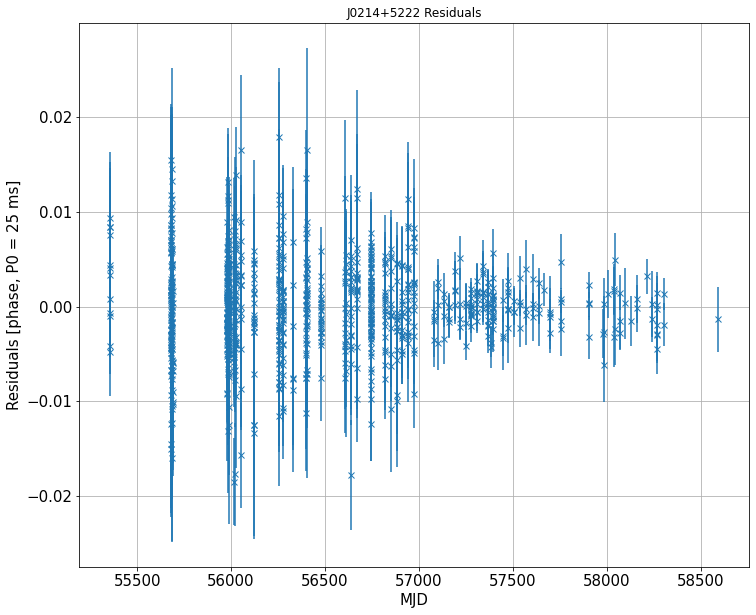

In [3]:
#### Remove TOAs if need be, look at the model

# "permanently" remove TOAs here 
#toas = mpt.mask_toas(toas,before=56500)

# "first look"

toas.compute_pulse_numbers(model)

mpt.plot_fit(toas,model)

2023-05-18 19:14:18.904 | DEBUG    | pint.models.absolute_phase:get_TZR_toa:96 - Creating and dealing with the single TZR_toa for absolute phase
2023-05-18 19:14:18.908 | DEBUG    | pint.toa:__init__:1340 - No pulse number flags found in the TOAs
2023-05-18 19:14:18.909 | DEBUG    | pint.toa:apply_clock_corrections:2182 - Applying clock corrections (include_gps = True, include_bipm = True)
2023-05-18 19:14:18.911 | INFO     | pint.observatory:gps_correction:209 - Applying GPS to UTC clock correction (~few nanoseconds)
2023-05-18 19:14:18.914 | INFO     | pint.observatory:bipm_correction:216 - Applying TT(TAI) to TT(BIPM2021) clock correction (~27 us)
2023-05-18 19:14:18.916 | INFO     | pint.observatory.topo_obs:clock_corrections:356 - Observatory lofar requires no clock corrections.
2023-05-18 19:14:18.919 | DEBUG    | pint.toa:compute_TDBs:2233 - Computing TDB columns.
2023-05-18 19:14:18.920 | DEBUG    | pint.toa:compute_TDBs:2254 - Using EPHEM = DE440 for TDB calculation.
2023-05-1

Fitted model using weighted_least_square method with 16 free parameters to 951 TOAs
Prefit residuals Wrms = 77.81854991154266 us, Postfit residuals Wrms = 77.77068528404382 us
Chisq = 933.419 for 934 d.o.f. for reduced Chisq of 0.999

PAR                        Prefit                  Postfit            Units
=================== ==================== ============================ =====
PSR                           J0214+5222 J0214+5222                   None
EPHEM                              DE440 DE440                        None
CLOCK                       TT(BIPM2021) TT(BIPM2021)                 None
UNITS                                TDB TDB                          None
START                            55353.9                      55353.9 d 
FINISH                           58594.7                      58594.7 d 
TIMEEPH                             FB90 FB90                         None
T2CMETHOD                       IAU2000B IAU2000B                     None
BINARY           

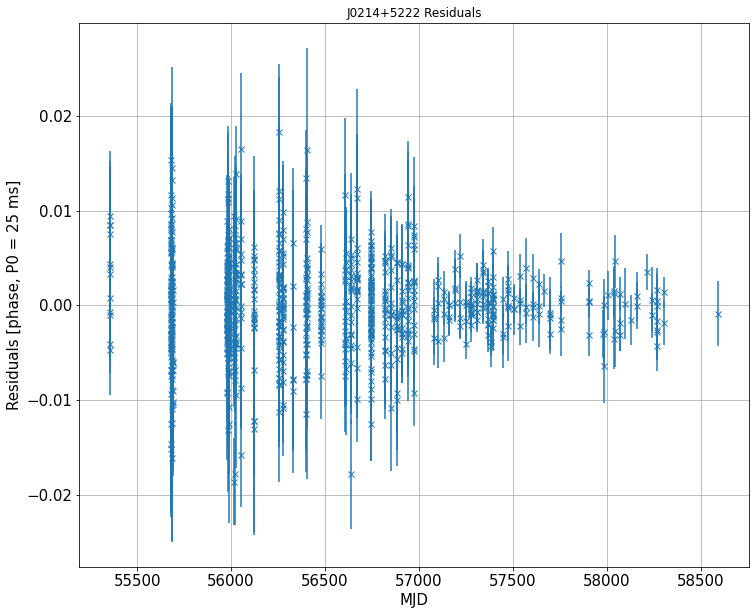

In [4]:
#### Do the fit

#model = f.model

f=WLSFitter(toas,model,track_mode='use_pulse_numbers')

# BT params #
f.model.free_params=['F0','F1','RAJ','DECJ','PMRA','PMDEC','DM','FB0',
                     'TASC','A1','A1DOT','EPS1','EPS2','JUMP1','JUMP2','JUMP3']

f.fit_toas(maxiter=3)
mpt.plot_fit(toas,f.model)
f.print_summary()
f.model.compare(model,verbosity='check')

In [5]:
#f.covariance_matrix

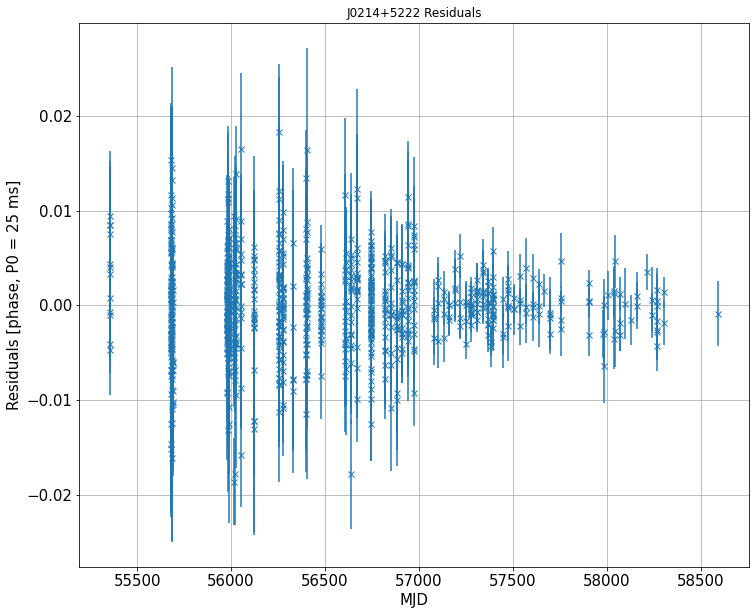

In [6]:
#### Update model, go back a step if further fitting needed

model=f.model

newtoas = toas

newtoas.compute_pulse_numbers(model)

mpt.plot_fit(newtoas,f.model)

In [7]:
# save model to file
# parfile=model.PSR.value+'_upd'+curdat+'.par'
# timfile=model.PSR.value+'_upd'+curdat+'.tim'
parfile=model.PSR.value+'_fiore+23.par'
timfile=model.PSR.value+'_upd'+curdat+'.tim'


mpt.write_partim(model=model,parfile=parfile,toas=newtoas,timfile=timfile,overwrite=True,final_dir='./data/')

./data/J0214+5222_fiore+23.par written
./data/J0214+5222_upd051823.tim written


In [8]:
residuals = f.resids.resids.to(u.us).value
errs = f.resids.get_data_error().to(u.us).value
mjds = newtoas.get_mjds().value
freqs = newtoas.get_freqs().value
fnames = newtoas['name']
outfile = "/Users/william/GBNCC/gbncc_viii/data/J0214+5222_residuals.dat"
with open(outfile, "w") as f:
    for r,e,m,n in zip(residuals,errs,mjds,freqs):
        line = f"{r} {e} {m} {n}\n"
        f.write(line)